<a href="https://colab.research.google.com/github/nerminkhalil/nerminkhalil/blob/main/Income_Data_Skewness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Skewness of Income: Total income: 7.07


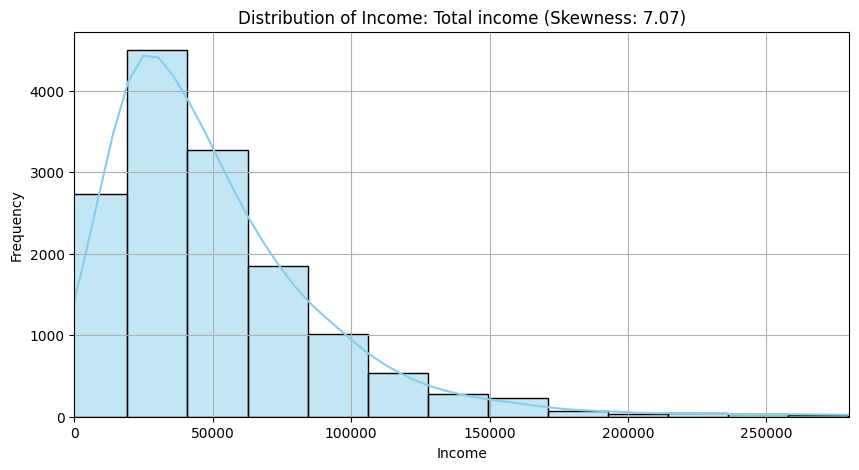

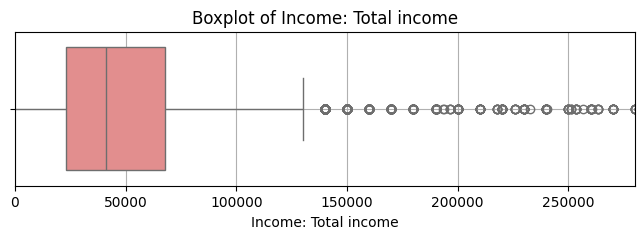

Number of outliers: 696
Upper bound: 135500.00, Lower bound: -44500.00


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# === Load your census data ===
df = pd.read_csv("/content/decoded_data_donnees_2021_11_inc_1.csv")

# === Clean and convert Income to numeric ===
income_col = 'Income: Total income'
df[income_col] = pd.to_numeric(df[income_col], errors='coerce')
df_income = df[[income_col]].dropna()

# === Calculate skewness ===
skewness_value = skew(df_income[income_col])
print(f"Skewness of {income_col}: {skewness_value:.2f}")

# === Plot Histogram ===
plt.figure(figsize=(10, 5))
sns.histplot(df_income[income_col], kde=True, bins=50, color='skyblue')
plt.title(f'Distribution of {income_col} (Skewness: {skewness_value:.2f})')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xlim(0, df_income[income_col].quantile(0.99))  # limit x-axis for better visibility
plt.grid(True)
plt.show()

# === Plot Boxplot for outlier detection ===
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_income[income_col], color='lightcoral')
plt.title(f'Boxplot of {income_col}')
plt.xlim(0, df_income[income_col].quantile(0.99))
plt.grid(True)
plt.show()

# === Identify outliers using IQR ===
Q1 = df_income[income_col].quantile(0.25)
Q3 = df_income[income_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_income[(df_income[income_col] < lower_bound) | (df_income[income_col] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Upper bound: {upper_bound:.2f}, Lower bound: {lower_bound:.2f}")
